We often have a dilemma deciding between assigning experimental units to different factors, to more 
levels of a given factor, or to more reps of a given factor-level combination.  Where should we put them 
for the best effect? This brings up the concept of leverage.
- Use ‘leverage.csv’ to determine the leverage each level has on the study.
- Rearrange/change the original levels to improve on the leverage.  
- Plot the two leverage analyses on the same graph. What seems to be the best strategy to use 
and why? 
- Extra studies might include multiple tests to optimize leverage and a short, concise description 
of the outcome that speculate on the pros and cons of each design.

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scienceplots


In [33]:
plt.style.use(['science', 'notebook', 'grid'])

In [37]:
# read csv file and convert it into 1D array.
data_array = pd.read_csv('leverage.csv').to_numpy()
df = pd.read_csv('leverage.csv')
levels_of_original = df['Original']
df 


,Original
0,135
1,100
2,90
3,90
4,80
5,80
6,75
7,75
8,75
9,75


In [8]:
# Design Matrix
a = [1] * len(data_array)  # create a list with same length of data_array
D = np.column_stack([a, data_array]) # create matrxi with 1st column:1 and 2nd column value

array([[  1, 135],
       [  1, 100],
       [  1,  90],
       [  1,  90],
       [  1,  80],
       [  1,  80],
       [  1,  75],
       [  1,  75],
       [  1,  75],
       [  1,  75],
       [  1,  75],
       [  1,  75],
       [  1,  50],
       [  1,  50],
       [  1,  30],
       [  1,  30],
       [  1,  30],
       [  1,  25],
       [  1,  25],
       [  1,  20],
       [  1,   1],
       [  1,   1]], dtype=int64)

In [14]:
# claculate the hat matrix H :  H = D(D^T D)^(-1) D^T
# dot(...)
    # dot(a, b, out=None)

    # Dot product of two arrays. Specifically,

    # - If both `a` and `b` are 1-D arrays, it is inner product of vectors
    #   (without complex conjugation).

# transpose of D 
D_T = D.T 

# D^T D 
D_T_D = np.dot(D_T, D)

# inverse of D^T D
D_T_D_inv = np.linalg.inv(D_T_D)

# multiply (1)D (2)D^T D^(-1) (3)D^T
H = np.dot(np.dot(D, D_T_D_inv), D_T)


[[ 0.27919394  0.17225435  0.14170018  0.14170018  0.11114601  0.11114601
   0.09586892  0.09586892  0.09586892  0.09586892  0.09586892  0.09586892
   0.0194835   0.0194835  -0.04162484 -0.04162484 -0.04162484 -0.05690192
  -0.05690192 -0.072179   -0.13023192 -0.13023192]
 [ 0.17225435  0.11424137  0.09766623  0.09766623  0.08109109  0.08109109
   0.07280352  0.07280352  0.07280352  0.07280352  0.07280352  0.07280352
   0.03136568  0.03136568 -0.0017846  -0.0017846  -0.0017846  -0.01007216
  -0.01007216 -0.01835973 -0.04985249 -0.04985249]
 [ 0.14170018  0.09766623  0.0850851   0.0850851   0.07250397  0.07250397
   0.06621341  0.06621341  0.06621341  0.06621341  0.06621341  0.06621341
   0.03476059  0.03476059  0.00959833  0.00959833  0.00959833  0.00330777
   0.00330777 -0.0029828  -0.02688694 -0.02688694]
 [ 0.14170018  0.09766623  0.0850851   0.0850851   0.07250397  0.07250397
   0.06621341  0.06621341  0.06621341  0.06621341  0.06621341  0.06621341
   0.03476059  0.03476059  0.0095

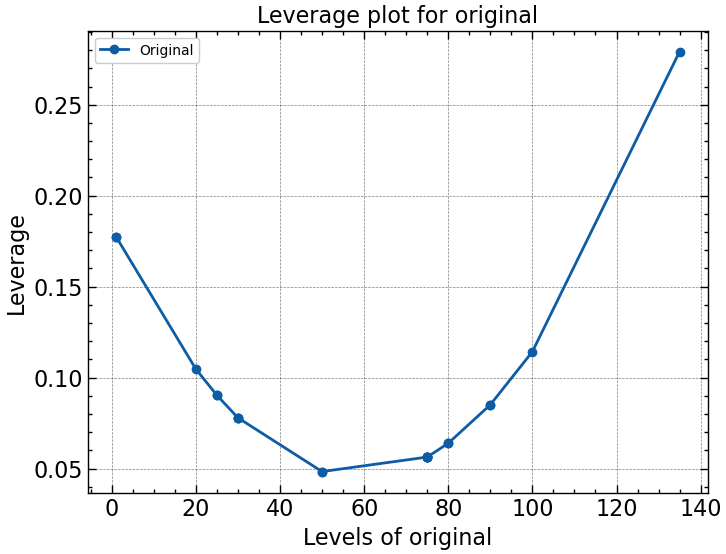

In [36]:
leverge = np.diagonal(H)
plt.plot(levels_of_original, leverge, 'o-', label='Original')
plt.xlabel('Levels of original')
plt.ylabel('Leverage')
plt.legend(loc = 'upper left', fontsize=10)
plt.title('Leverage plot for original')
plt.show()

The level at 135 has a great impact on the results. 

## Rearrange levels: 
- delete some levels
- add more reps on exisiting levels
- make sure at least we have 3 levels and 3 reps on each levels

In [57]:
# rearrange levels
# get rid of 125
# leverage_new.csv 
df1 = pd.read_csv('leverage_new.csv')

In [58]:
df1_array = df1.to_numpy()
a1 = [1]*len(df1_array)
D1 = np.column_stack([a1, df1_array])


In [59]:

D1_T = D1.T  
D1_T_D1 = np.dot(D1_T, D1)
D1_T_D1_inv = np.linalg.inv(D1_T_D1)
H1 = np.dot(np.dot(D1, D1_T_D1_inv), D1_T)
leverge1 = np.diagonal(H1)
levels_of_original1 = df1['Original']



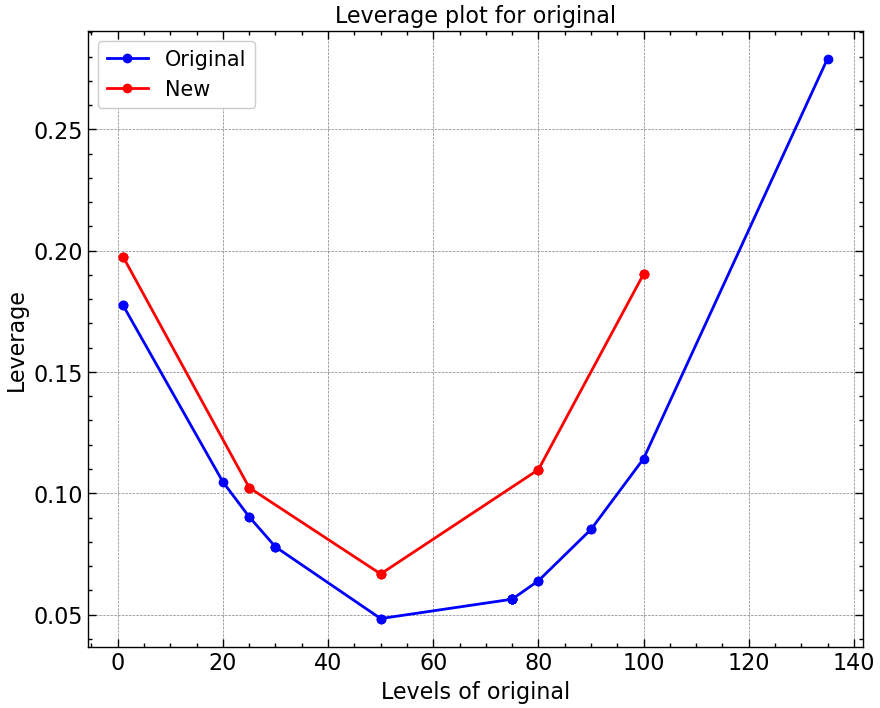

In [65]:
plt.figure(figsize=(10,8))
plt.plot(levels_of_original, leverge, 'o-', label='Original', color = 'blue')
plt.xlabel('Levels of original')
plt.ylabel('Leverage')
plt.legend(loc = 'upper left', fontsize=10)
plt.title('Leverage plot for original')
plt.plot(levels_of_original1, leverge1, 'o-', label='New', color = 'red')
plt.xlabel('Levels of original')
plt.ylabel('Leverage')
plt.legend(loc = 'upper left', fontsize=15)
plt.title('Leverage plot for original')
plt.show()